In [ ]:
#Importer
import numpy as np

## Oppgave 6: Varmeligning,  (10 poeng)

Nå skal vi modellere steking av et legeme i en ovn. Vi ser på et tverrsnitt av legemet, slik at vi kun trenger de to koordinatretningene $x$ og $y$, og ikke dybderetningen $z$ for ovnen og legemet. 

Den partielle differensiallikningen er lik
$$
\begin{align}\tag{19}
u_t = \alpha\cdot(u_{xx} + u_{yy}),
\end{align}
$$
hvor $\alpha$ er legemets *termiske diffusivitet*. Passende tall for $\alpha$ kan slås opp på nett.

Vi antar at temperaturen av luft i ovnen holdes konstant på $200$ grader Celsius hele tiden, og bruker altså randbetingelsene at $u(x,y)=200$ på alle kantene av legemet.

Differensialligningen er kun definert for legemet, vi tar ikke med ovnen rundt i denne oppgaven.

Ved tiden $t=0$ (når legemet settes i ovnen) så er temperaturen lik $15$ grader i hele legemet.


### a)

Velg en gjenstand å ta utgangspunkt i, hvor gjendstanden skal ha et rektangulært tverrsnitt. Hvilket materiale har gjenstanden, og hva er den termiske diffusitiviteten $\alpha$?

Bestem deretter hvilke verdier for koordinatene $x$ og $y$ som beskriver gjenstanden.

In [94]:
# Vi tar utgangspunkt i et brød

alpha = 1.5e-7     # Termisk diffusivitet (m^2/s) TODO: finne en mer passende verdi
punkterPerCm = 1; # 1 punkt per mm
length = 30        # Cm
width = 10         # Cm
lengthPoints = length*punkterPerCm
widthPoints = width*punkterPerCm


## Initial tempraturer
tempLuft = 200
starTtempBrød = 15


### b)

Sett opp den partielle differensiallikningen med rand- og initialbetingelser. Løs deretter likningen numerisk.

Legg ved *varmeplot* (altså fargeplot med rødt for varmt og blått for kaldt) for noen ulike tidspunkt.

In [95]:
## Setter opp tempraturfeltet for brødet
tempFelt = np.full((lengthPoints, widthPoints), starTtempBrød) # Brødets tempraturfelt med tempratur på 15 c

# Setter kantende til lufttempraturen
tempFelt[0, :] = tempLuft
tempFelt[-1, :] = tempLuft
tempFelt[:, 0] = tempLuft
tempFelt[:, -1] = tempLuft

def compute_temperature_derivative(temperature, i, j):
    return alpha * (
        (temperature[i+1, j] - 2*temperature[i, j] + temperature[i-1, j]) / 0.1**2 +
        (temperature[i, j+1] - 2*temperature[i, j] + temperature[i, j-1]) / 0.1**2 )

# Gjør et steg av eulers metode.
# Returnerer det oppdaterte tempraturfelte
def eulers():
    dt = 0.25 * min(dx**2, dy**2) / thermal_diffusivity  # Stabilitetsbetingelse # endring i tid

    new_temperature_field = tempFelt.copy()
    for i in range(1, lengthPoints-1):
        for j in range(1, widthPoints-1):
            # Eulers metode for varmeledning
            temperature_change = compute_temperature_derivative(tempFelt, i, j)
            new_temperature_field[i, j] = tempFelt[i, j] + dt * temperature_change  # Eulers oppdatering

    return new_temperature_field

### c)

Hvor lang tid tar det før temperaturen i midten av legemet når 60 grader? Legg ved et varmeplot for tidspunktet dette skjer.

In [97]:
midpunkt = [(length*punkterPerCm)/2, (width*punkterPerCm)/2]
lengthMid = midpunkt[0]
widthMid = midpunkt[1]

time = 0.0


while(tempFelt[15,5] < 60):
	tempFelt = eulers()
	time = time + 0.25
print (time)

KeyboardInterrupt: 

### d)

Lag en animasjon som viser hvordan temperaturen til legemet endrer seg over tid.

Dere trenger ikke å ta med animasjonen i rapporten, men inkluder kildekode og forklar hva dere observerer.

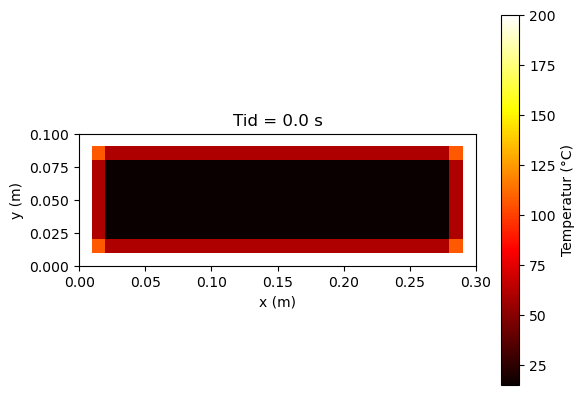

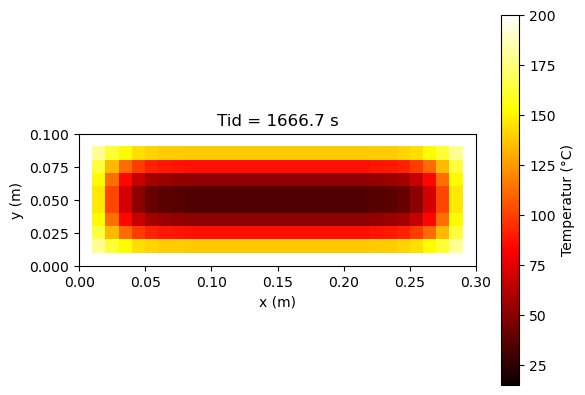

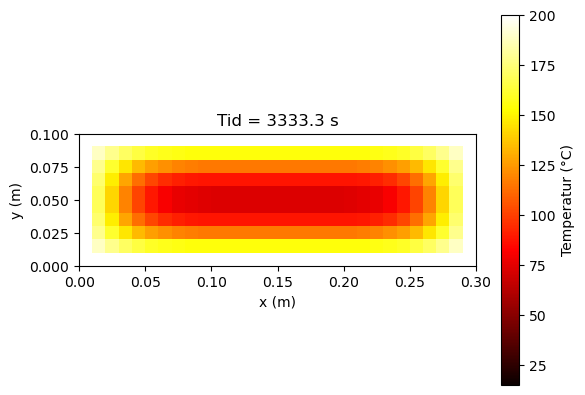

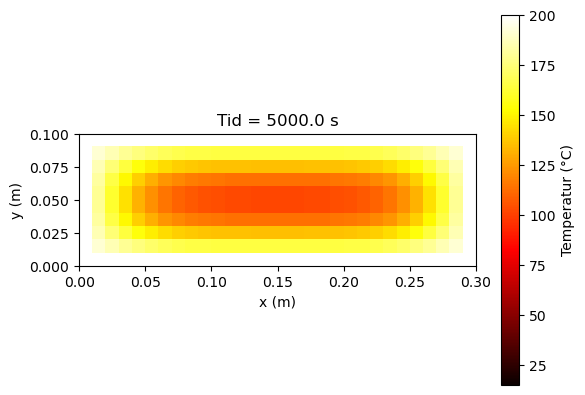

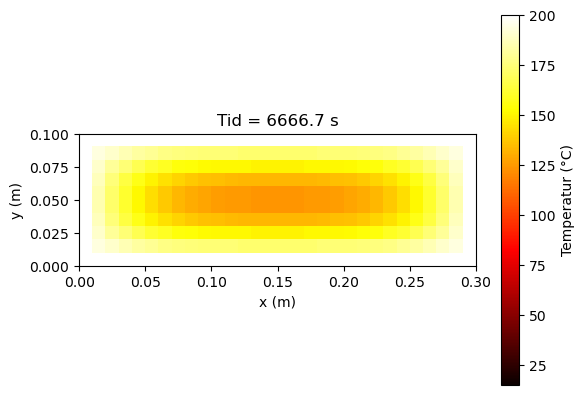

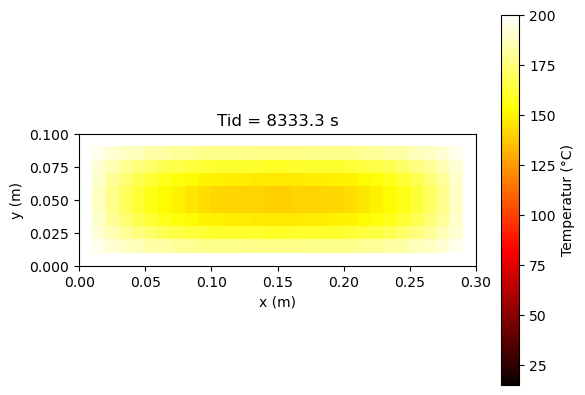

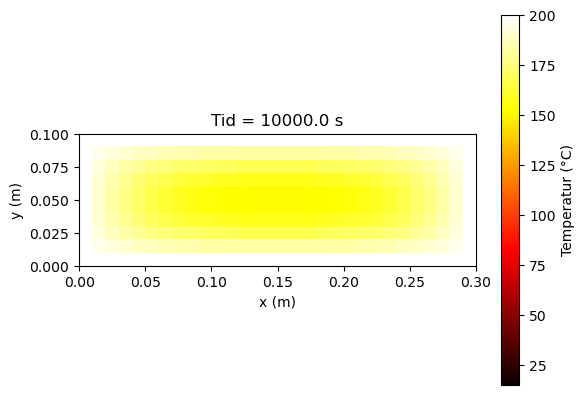

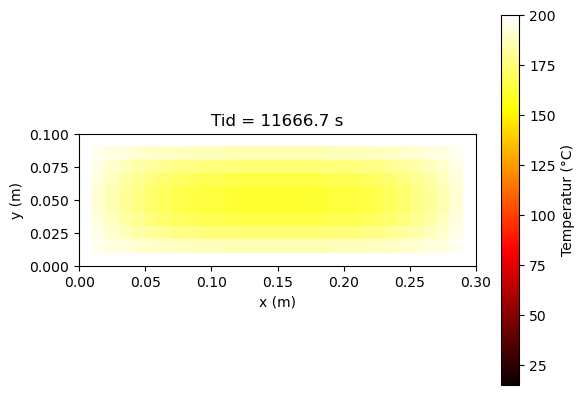

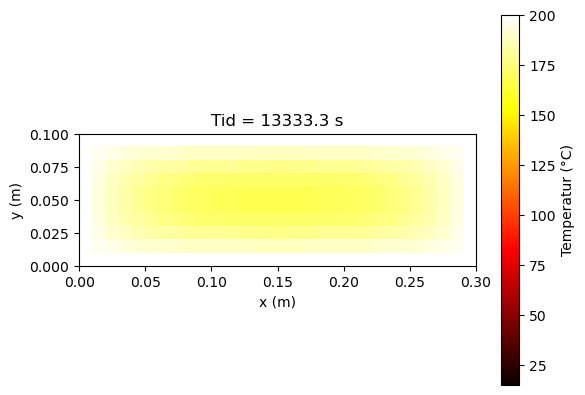

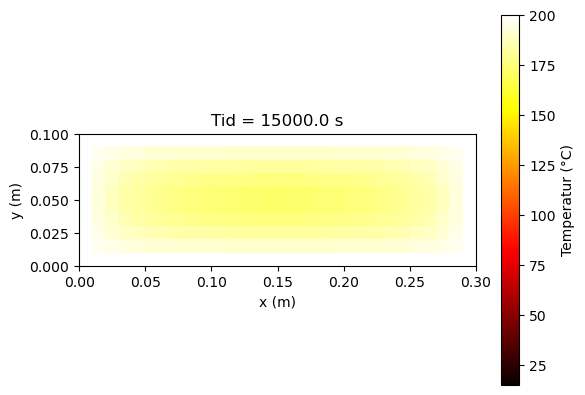

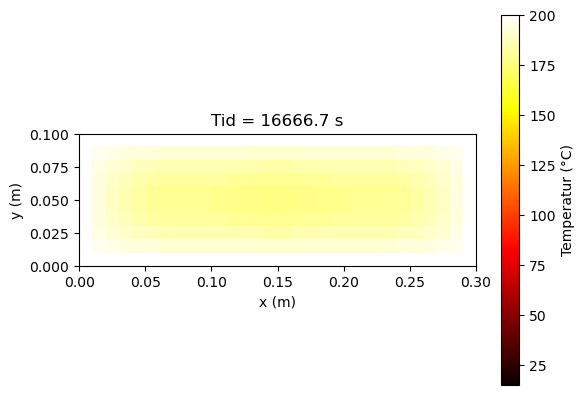

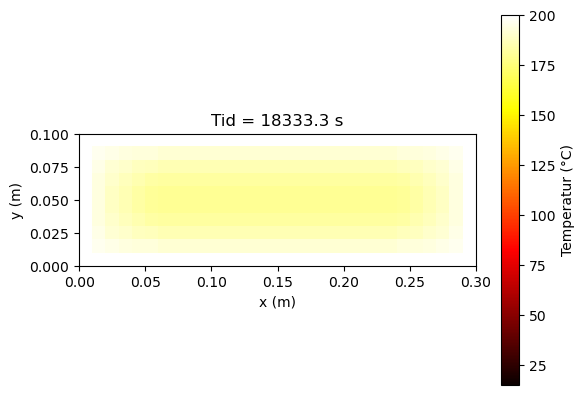

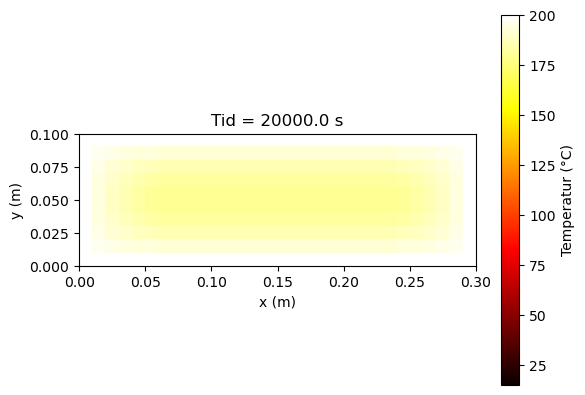

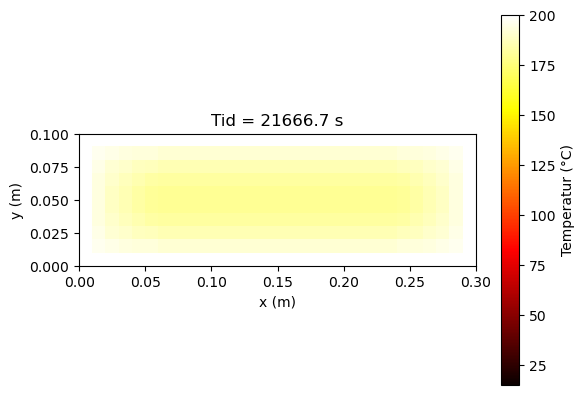

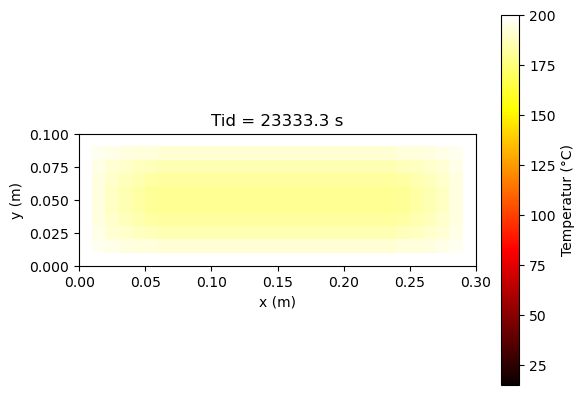

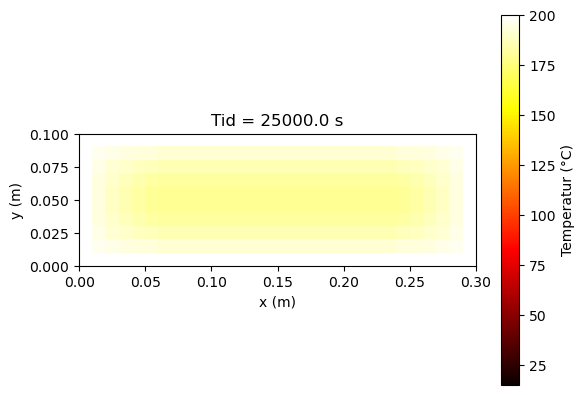

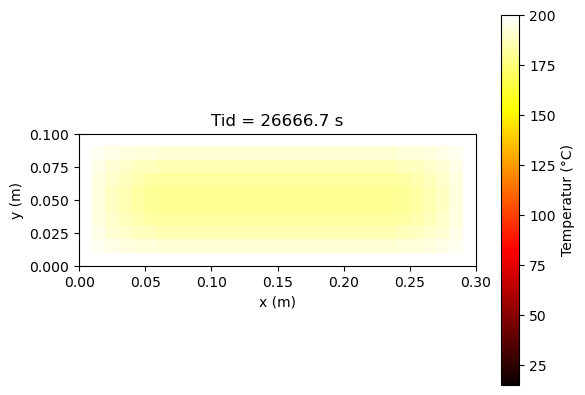

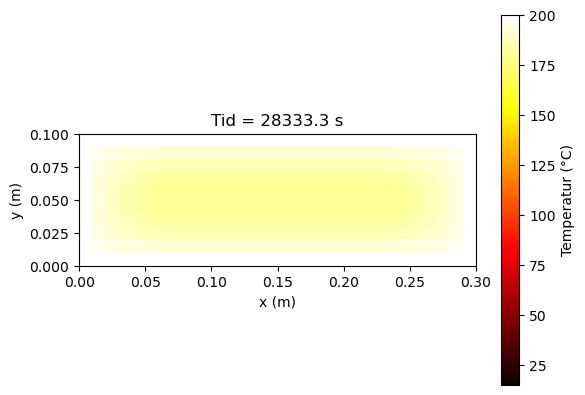

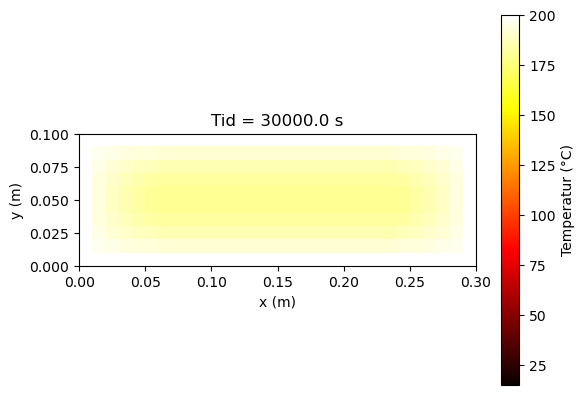

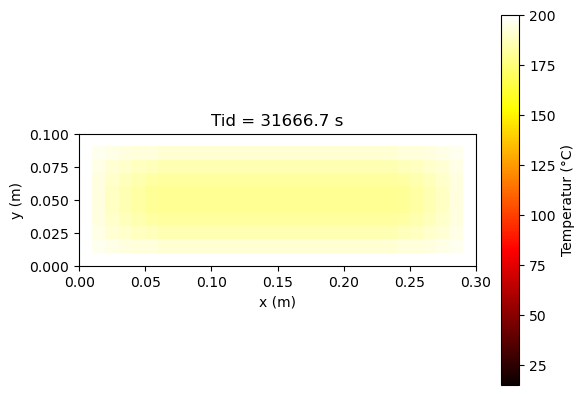

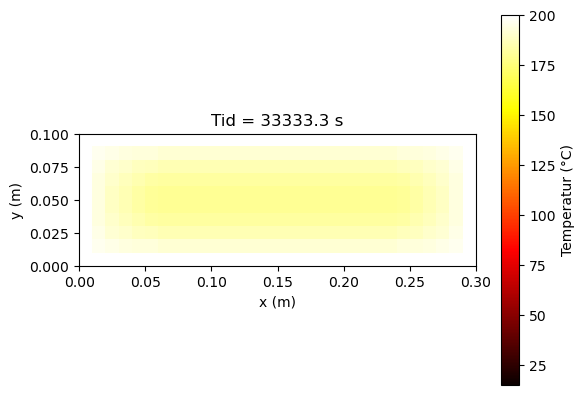

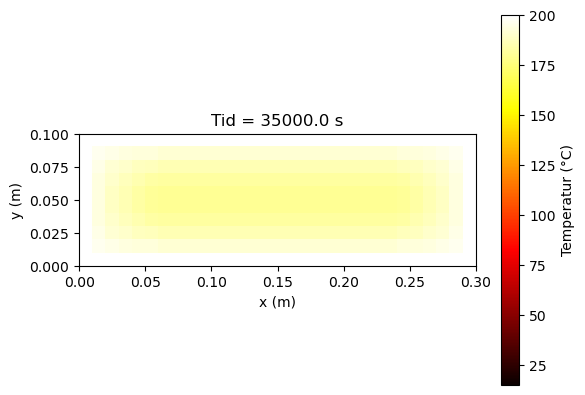

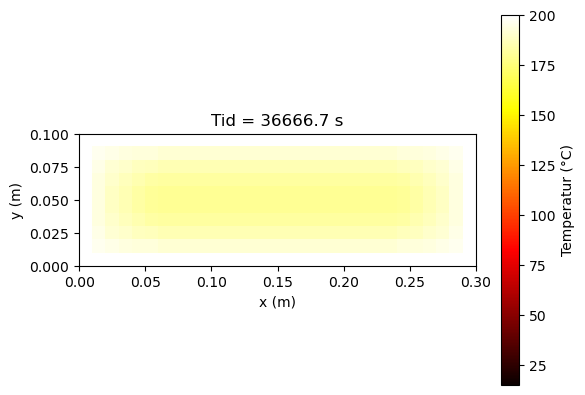

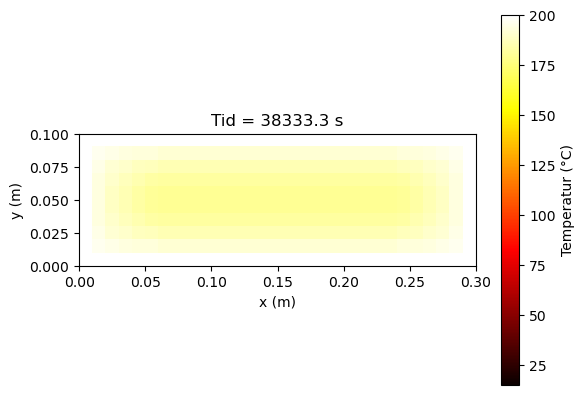

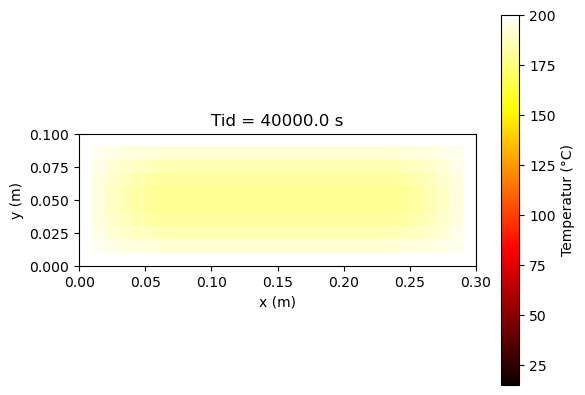

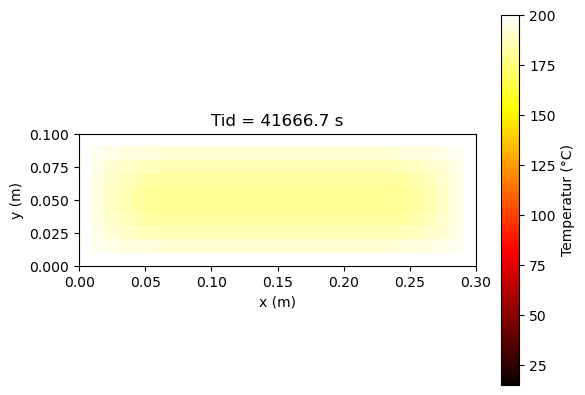

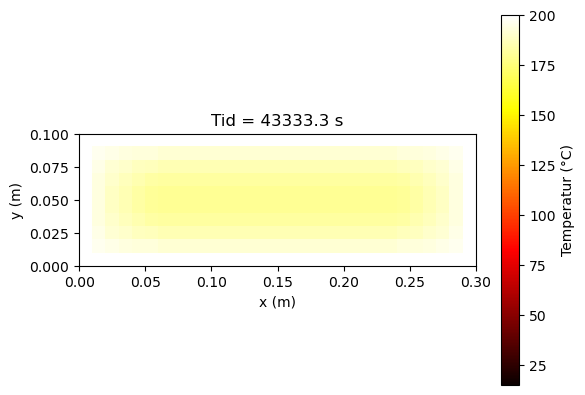

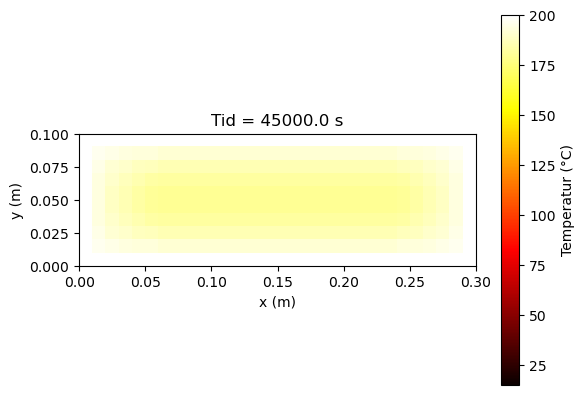

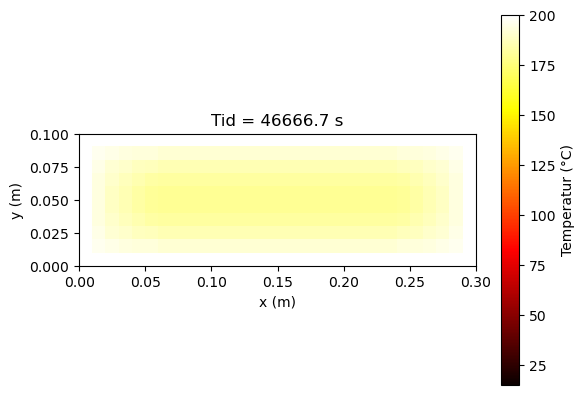

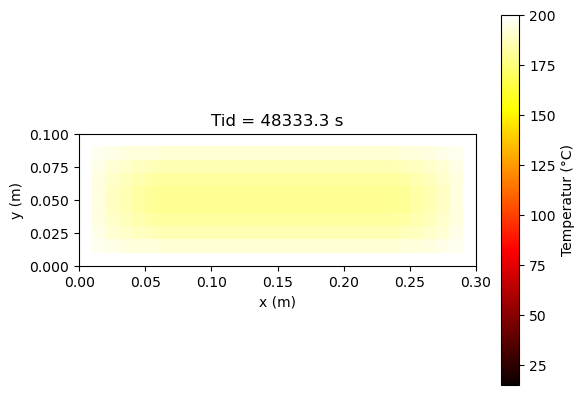

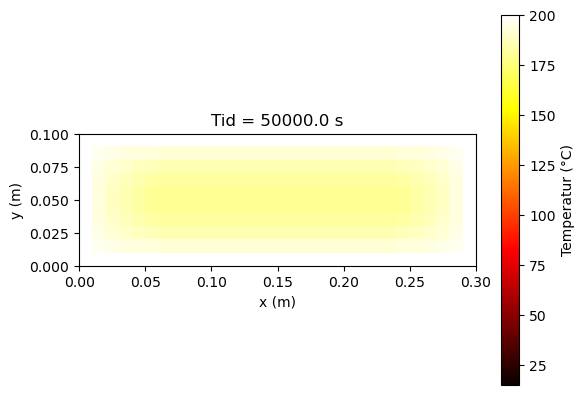

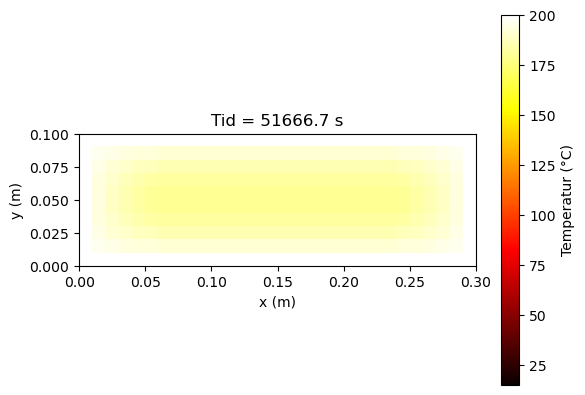

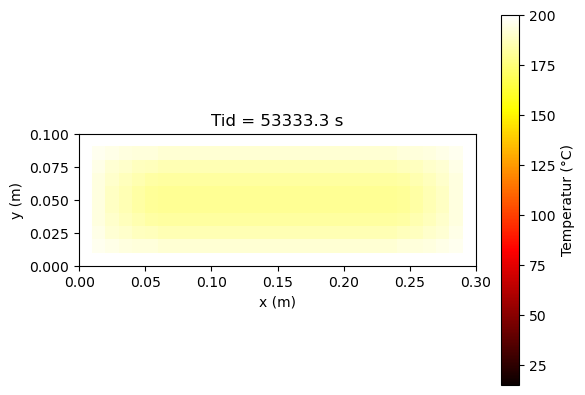

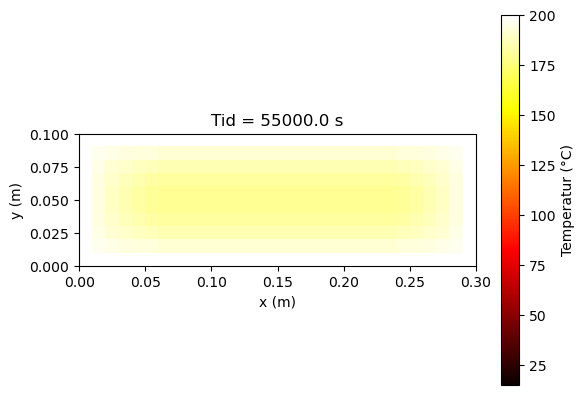

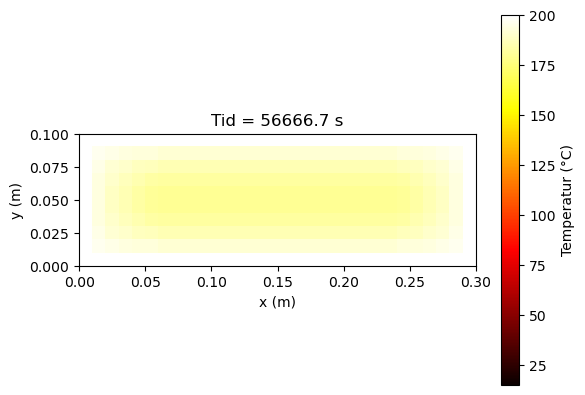

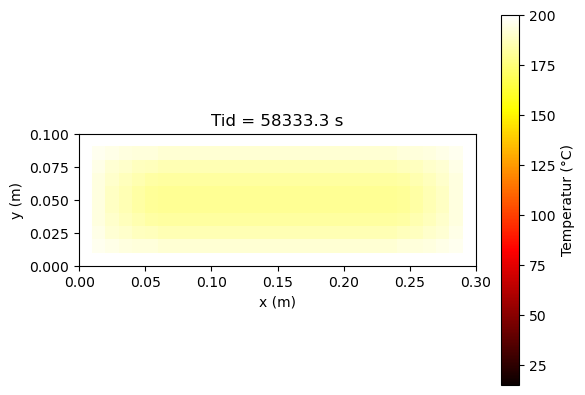

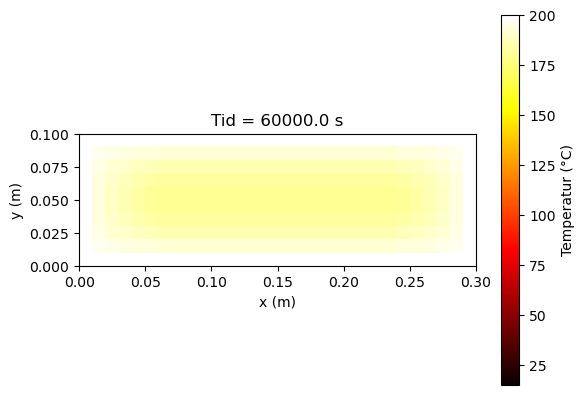

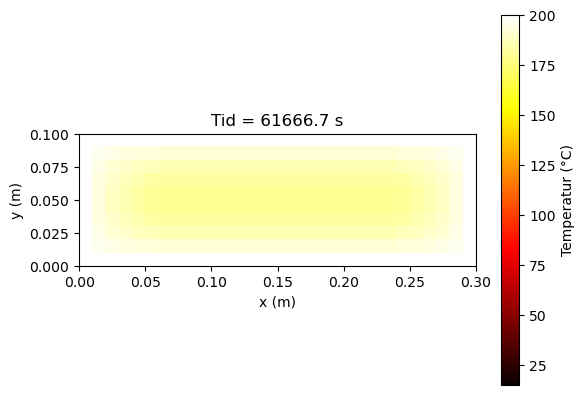

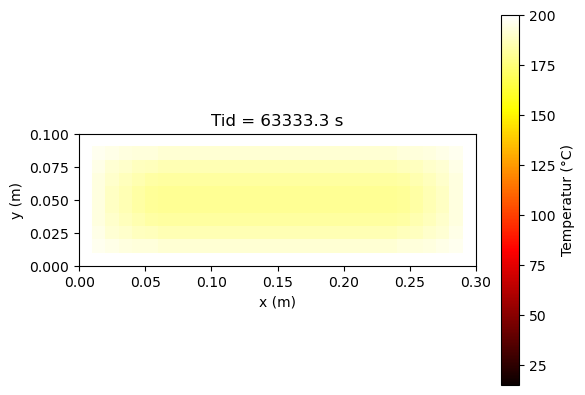

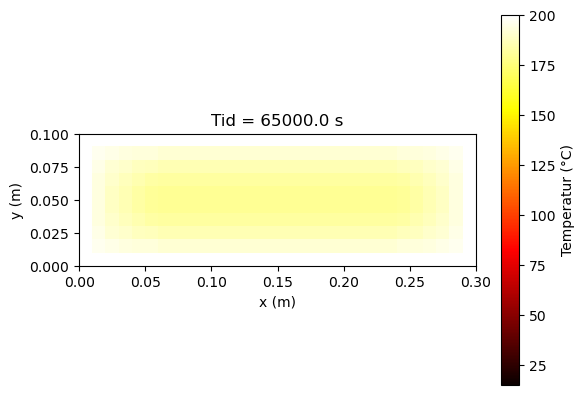

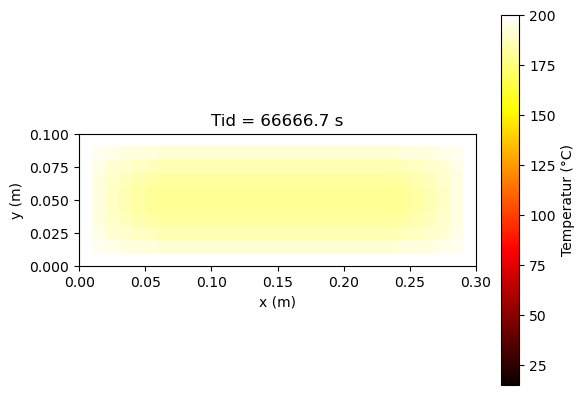

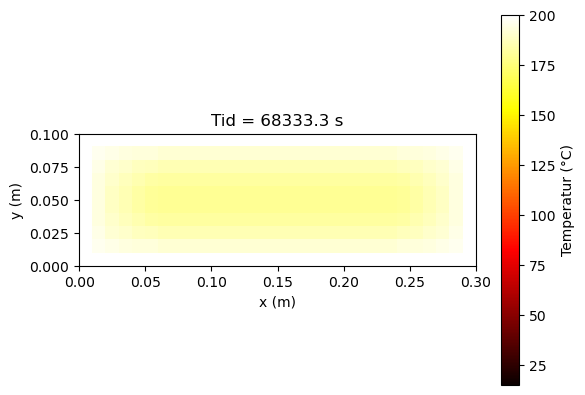

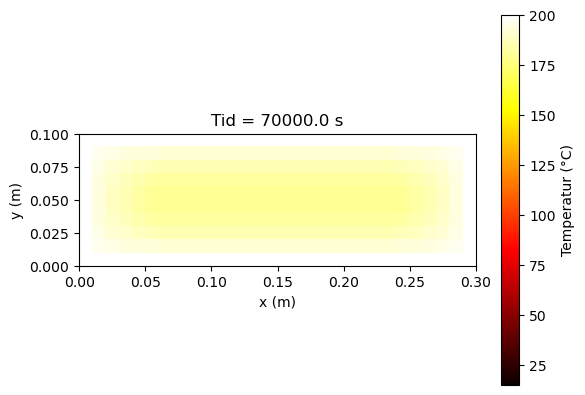

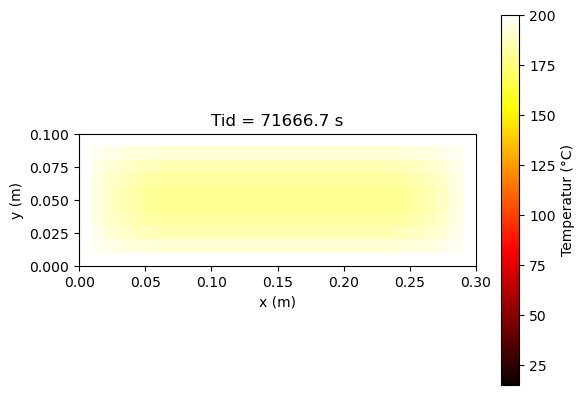

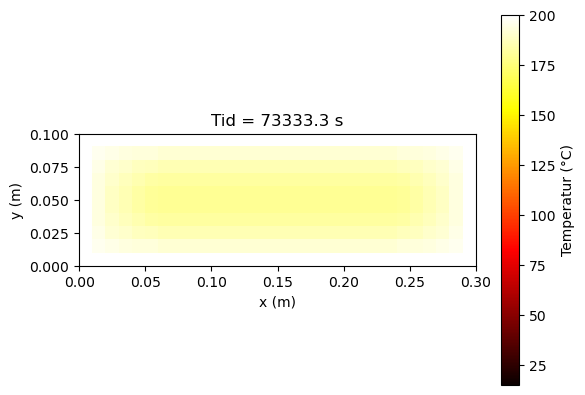

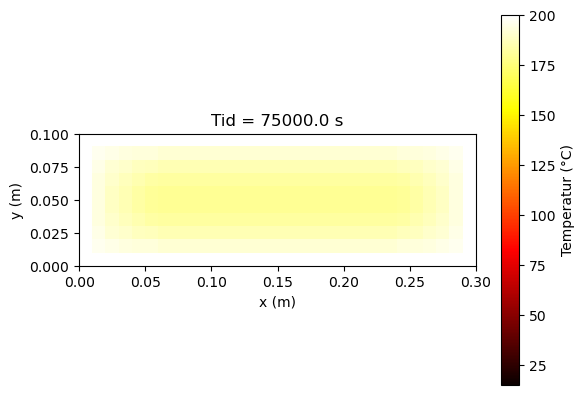

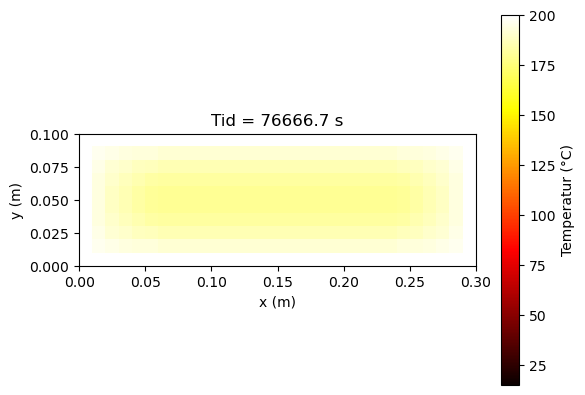

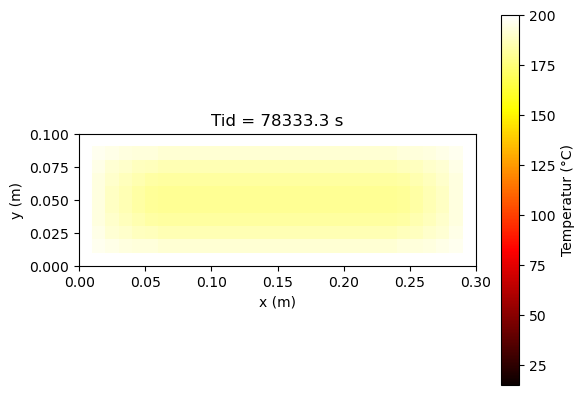

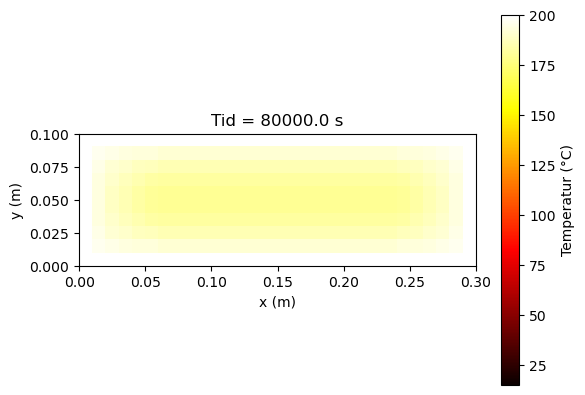

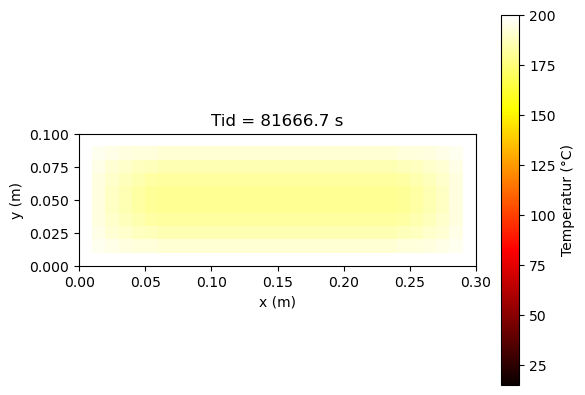

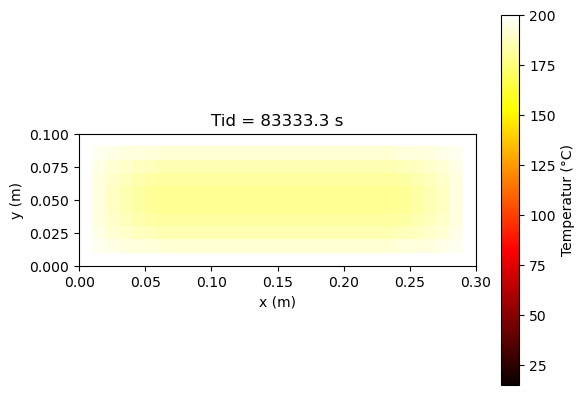

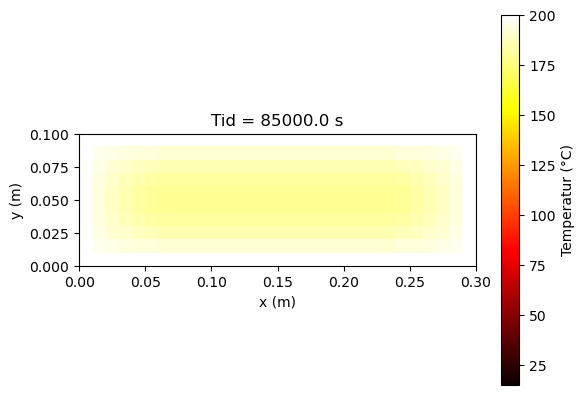

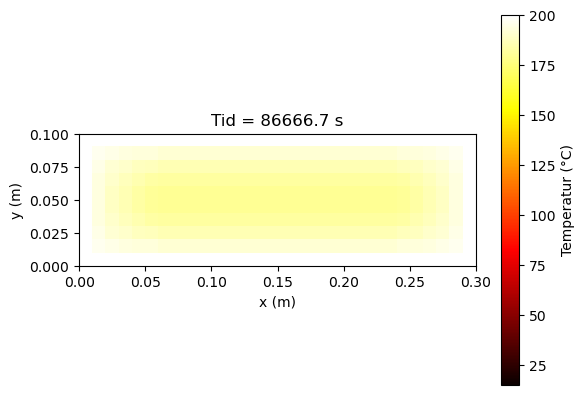

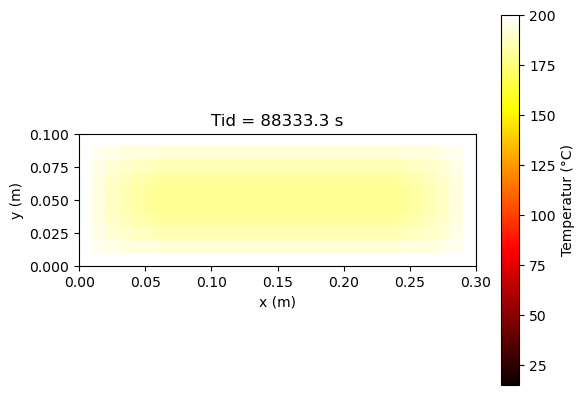

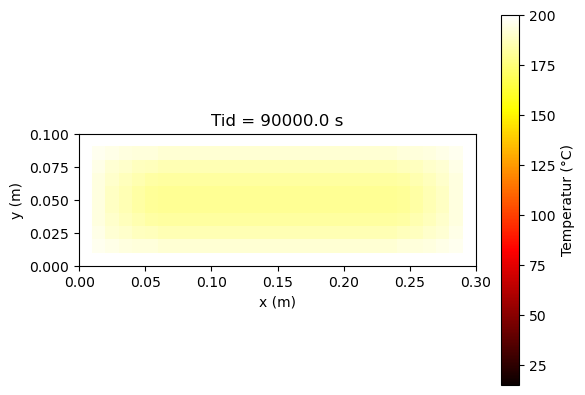

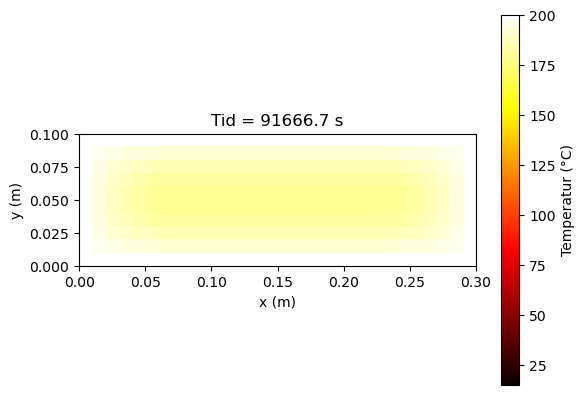

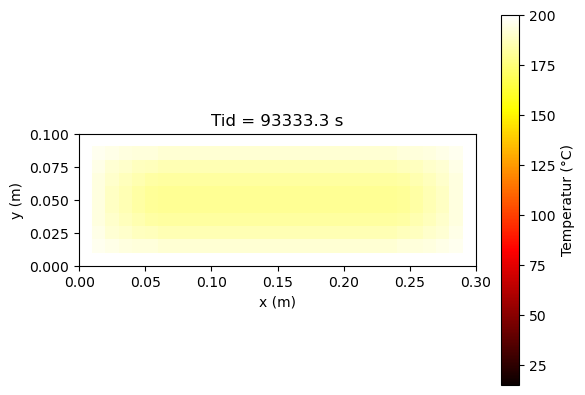

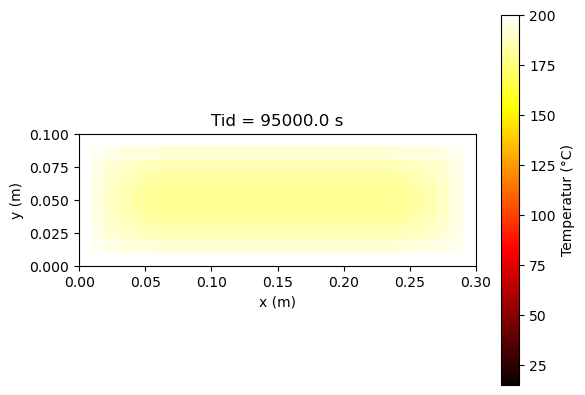

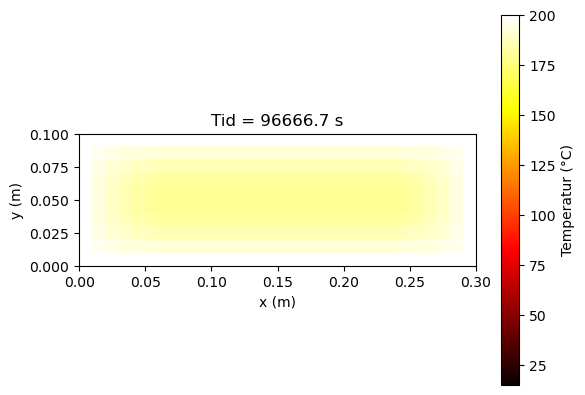

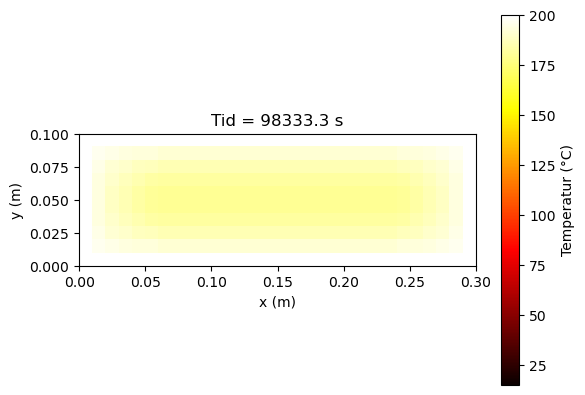

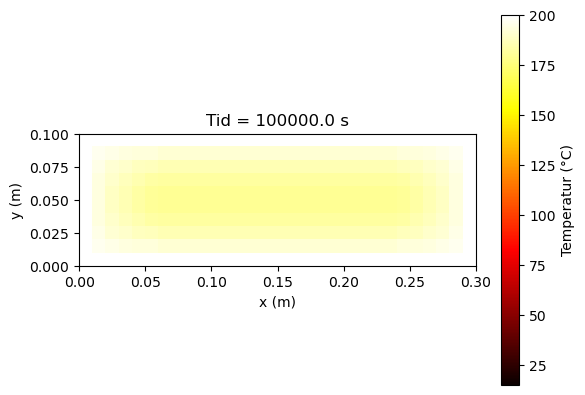

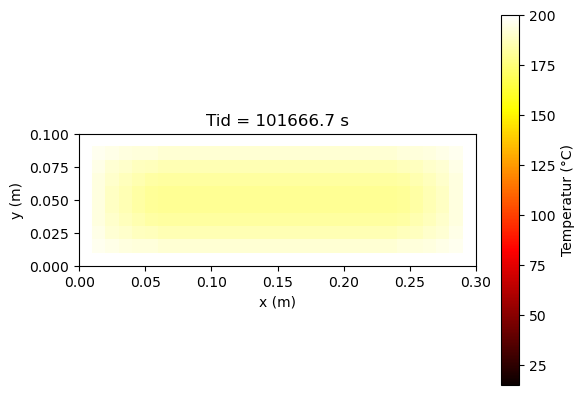

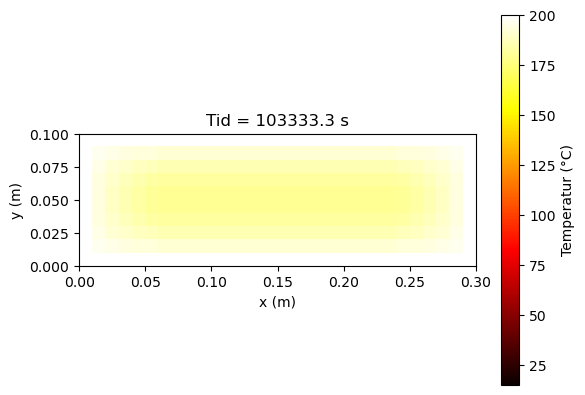

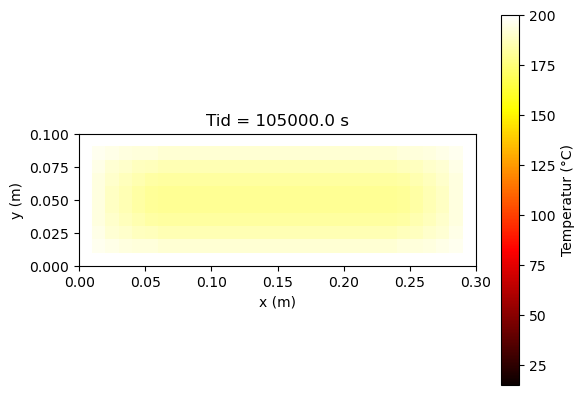

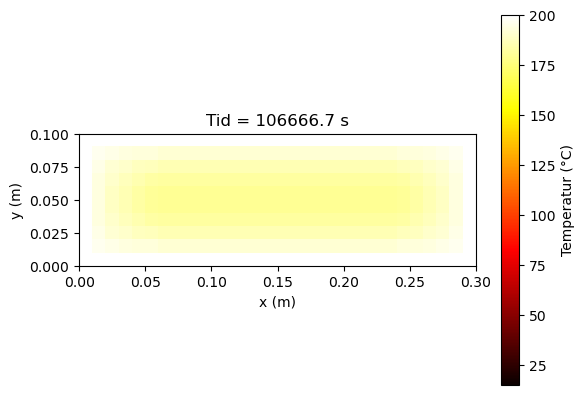

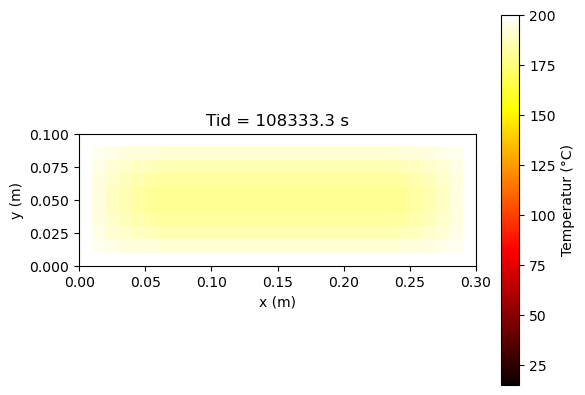

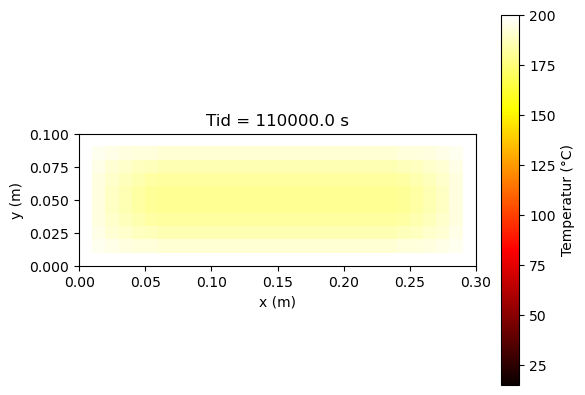

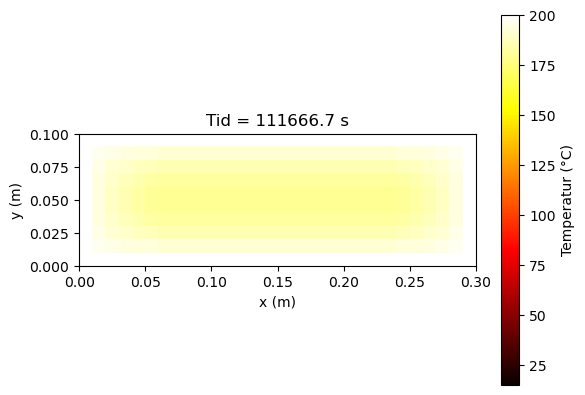

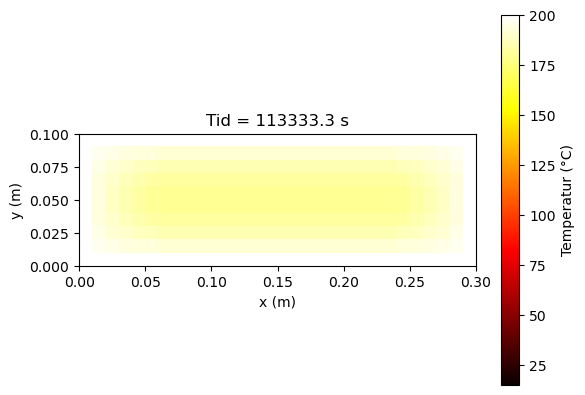

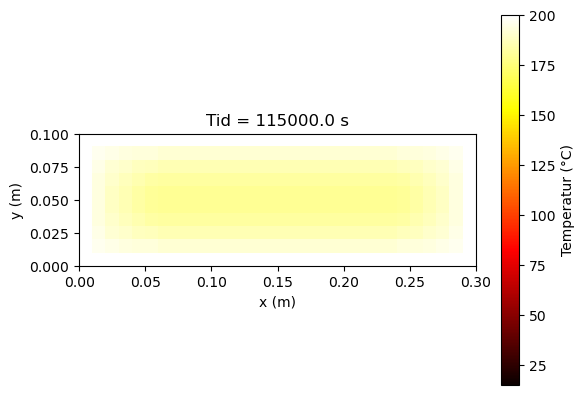

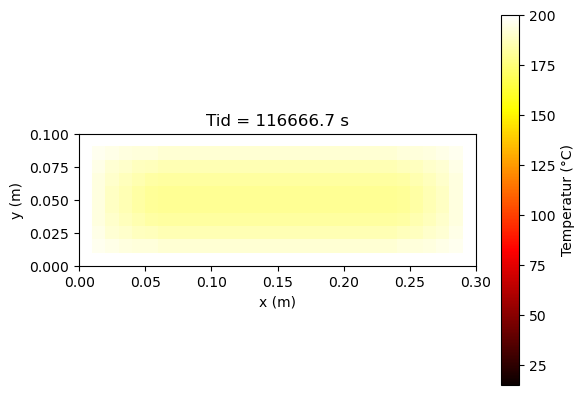

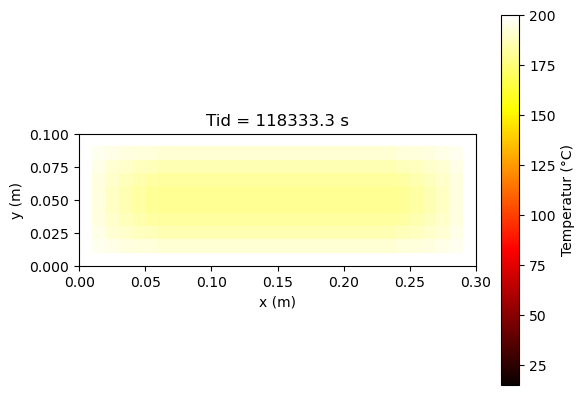

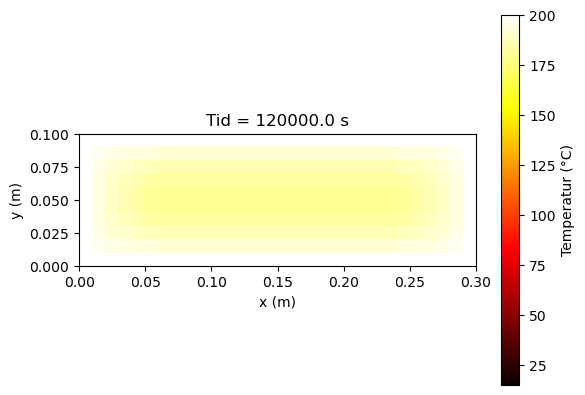

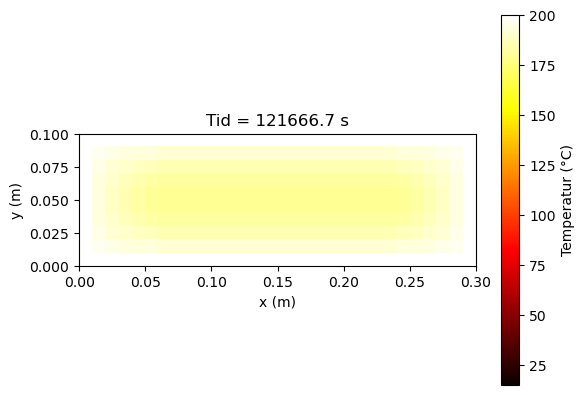

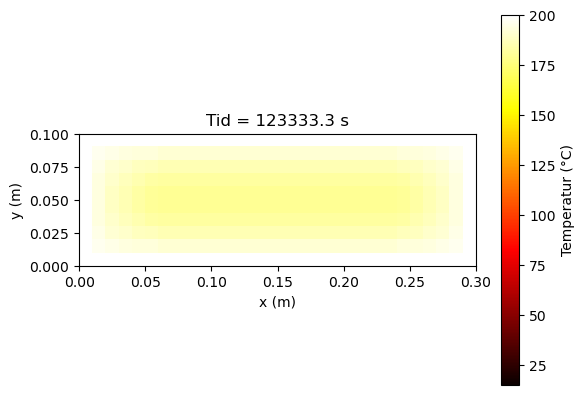

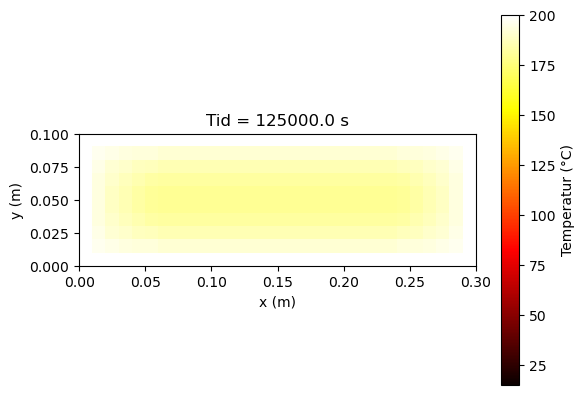

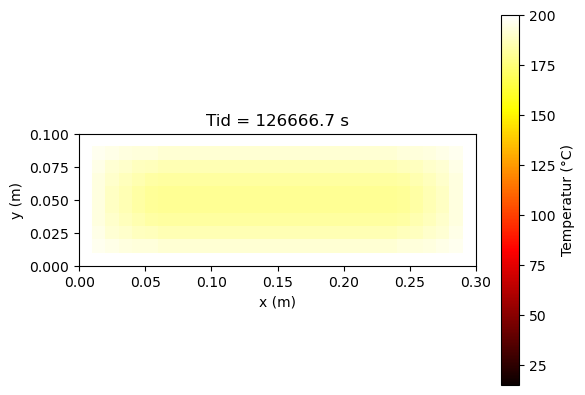

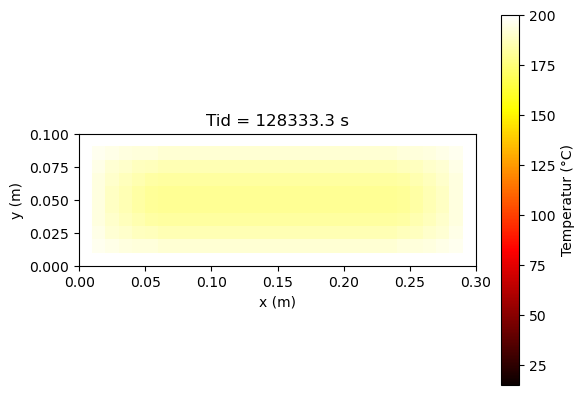

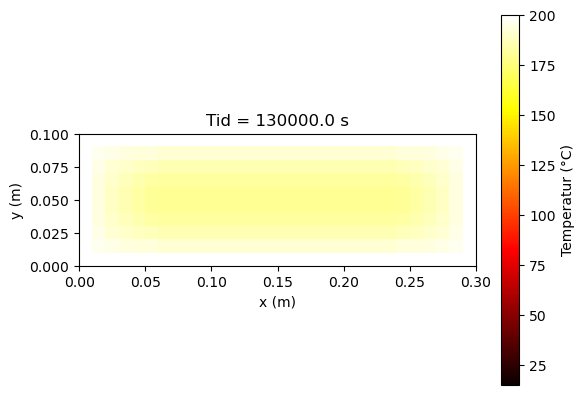

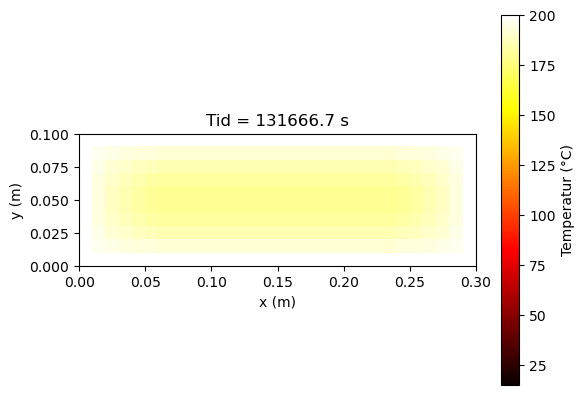

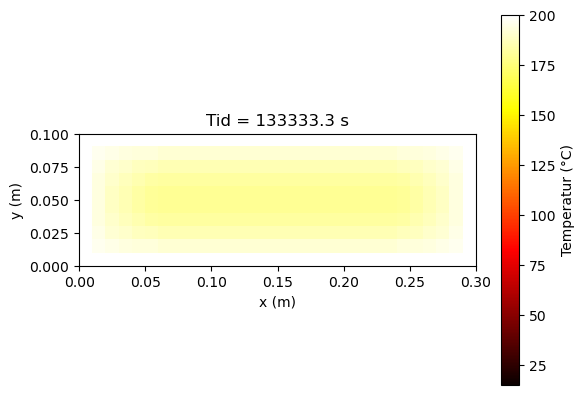

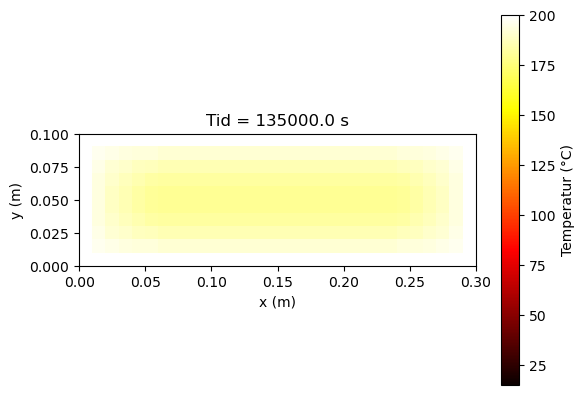

KeyboardInterrupt: 

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parametre
length_x, length_y = 0.3, 0.1   # Dimensjoner på legemet (meter)
grid_x, grid_y = 30, 10        # Antall diskretiseringspunkter
thermal_diffusivity = 1.5e-7   # Termisk diffusivitet (m^2/s)
edge_temperature = 200         # Temperatur på kantene (Celsius)
initial_temperature = 15       # Starttemperatur (Celsius)
dx, dy = length_x/grid_x, length_y/grid_y

dt = 0.25 * min(dx**2, dy**2) / thermal_diffusivity  # Stabilitetsbetingelse
num_timesteps = 1000  # Antall tidssteg

# Initialiser temperaturfelt
temperature_field = np.full((grid_x, grid_y), initial_temperature)

# Sett randbetingelser
temperature_field[0, :] = edge_temperature
temperature_field[-1, :] = edge_temperature
temperature_field[:, 0] = edge_temperature
temperature_field[:, -1] = edge_temperature

# Funksjon for å beregne den tidslige derivertens bidrag
def compute_temperature_derivative(temperature, i, j, diffusivity, dx, dy):
    return diffusivity * (
        (temperature[i+1, j] - 2*temperature[i, j] + temperature[i-1, j]) / dx**2 +
        (temperature[i, j+1] - 2*temperature[i, j] + temperature[i, j-1]) / dy**2 )

# Funksjon for å oppdatere temperaturfeltet med Eulers metode
for timestep in range(num_timesteps):
    new_temperature_field = temperature_field.copy()
    for i in range(1, grid_x-1):
        for j in range(1, grid_y-1):
            # Eulers metode for varmeledning
            temperature_change = compute_temperature_derivative(temperature_field, i, j, thermal_diffusivity, dx, dy)
            new_temperature_field[i, j] = temperature_field[i, j] + dt * temperature_change  # Eulers oppdatering
    temperature_field = new_temperature_field

    # Plott på utvalgte tidssteg
    if timestep % (10) == 0:
        plt.figure()
        plt.imshow(temperature_field.T, origin='lower', cmap='hot', extent=[0, length_x, 0, length_y],vmin=15)
        plt.colorbar(label='Temperatur (°C)')
        plt.title(f'Tid = {timestep*dt:.1f} s')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.show()

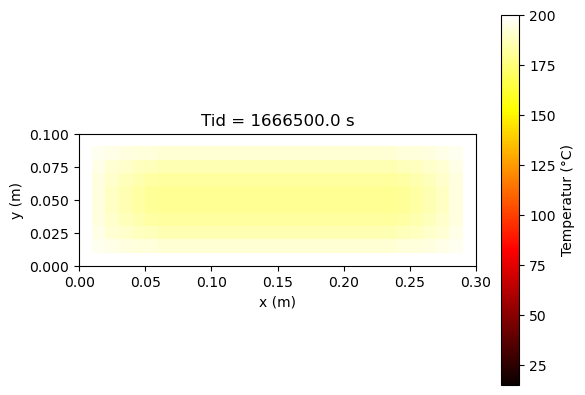

In [76]:
plt.imshow(temperature_field.T, origin='lower', cmap='hot', extent=[0, length_x, 0, length_y], vmin=15)
plt.colorbar(label='Temperatur (°C)')
plt.title(f'Tid = {timestep*dt:.1f} s')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()